## MLR Model#3

- [BACK TO TEST DATASET - Clean file](SamayShah_Project2(TEST)_DataCleaning_Test_Dataset.ipynb)
- [BACK TO TRAIN DATASET - Clean file](SamayShah_Project2(Main_TRAIN)_DataCleaning_Train_Dataset.ipynb)
- [TRAIN USING MODEL#4 (MAIN)](SamayShah_MODEL%234__FINAL_MODEL__.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from scipy import stats

%matplotlib inline

In [2]:
originaldf = pd.read_csv('datasets/v3_clean_nooutliers.csv')

In [3]:
df3 = pd.read_csv('datasets/model3_withdummies.csv')

## Linear Regression Model - 3

In [4]:
## For this model - 'Lot Area', 'Total Bsmt SF', 'Bedroom AbvGr' + most of dummy variables
targets3 = df3['log_SalePrice']
## Inputs everything except the target & SalePrice
inputs3 = df3.drop(columns=['log_SalePrice','Id'],axis=1)

In [5]:
## Using stats model first

In [6]:
Input = sm.add_constant(inputs3)

In [7]:
results = sm.OLS(targets3,inputs3).fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          log_SalePrice   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.894e+04
Date:                Fri, 09 Apr 2021   Prob (F-statistic):                        0.00
Time:                        07:01:34   Log-Likelihood:                         -1233.1
No. Observations:                1972   AIC:                                      2560.
Df Residuals:                    1925   BIC:                                      2823.
Df Model:                          47                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Lot Area                  4.03e-05    4.4e-06      9.155      0.000    3.17e-05    4.89e-05
Bedroom AbvGr               0.1595      0.017      9.612      0.000       0.127       0.192
Total Bsmt SF               0.0004    4.7e-05      8.699      0.000       0.000       0.001
Lotshape_isRegular          0.1247      0.025      5.030      0.000       0.076       0.173
isLotCorner                 0.0165      0.029      0.576      0.564      -0.040       0.073
isLotCulDSac                0.0419      0.048      0.880      0.379      -0.052       0.135
isgood_overall              0.0635      0.028      2.296      0.022       0.009       0.118
hasgood_Exterior            0.4466      0.069      6.440      0.000       0.311       0.583
is_roofGable                0.1145      0.028      4.102      0.000       0.060       0.169
has_masonryveneer           0.0141      0.025      0.565      0.572      -0.035       0.063
Heating QC                  0.1074      0.015      7.282      0.000       0.078       0.136
hasgood_Basement            0.1086      0.029      3.716      0.000       0.051       0.166
is_fullfurnished            0.9243      0.120      7.681      0.000       0.688       1.160
has_goodGarage              0.1380      0.045      3.052      0.002       0.049       0.227
Garage Cars                 0.0454      0.022      2.079      0.038       0.003       0.088
Street_isPaved              5.8217      0.144     40.410      0.000       5.539       6.104
total_half_baths            0.1456      0.025      5.863      0.000       0.097       0.194
total_full_baths            0.1440      0.019      7.496      0.000       0.106       0.182
has_centralAir              0.1735      0.051      3.401      0.001       0.073       0.274
is_remodeled               -0.0440      0.039     -1.122      0.262      -0.121       0.033
has_1pluskitchen            0.9037      0.089     10.116      0.000       0.728       1.079
has_goodkitchen            -0.0223      0.032     -0.707      0.480      -0.084       0.040
is_fullyfunctional          0.4379      0.045      9.744      0.000       0.350       0.526
has_fireplace              -0.0012      0.025     -0.049      0.961      -0.051       0.048
has_detachedGarage          0.1101      0.031      3.577      0.000       0.050       0.170
has_miscFeatures            0.1132      0.060      1.881      0.060      -0.005       0.231
has_pool                    0.1565      0.191      0.821      0.412      -0.217       0.530
has_woodDeck               -0.0005      0.023     -0.020      0.984      -0.046       0.045
has_Porch                   0.0636      0.026      2.450      0.014       0.013       0.114
has_paveddriveway           0.1546      

### Train Test Split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(inputs3, targets3, test_size=0.40, random_state=365)

### Scale the data

In [10]:
scaler3 = StandardScaler()

In [11]:
# Fit the inputs (calculate the mean and standard deviation feature-wise)

x_train_scaled = scaler3.fit_transform(x_train)
x_test_scaled = scaler3.transform(x_test)

##scaler3.fit(inputs3)

In [12]:
##inputs3_scaled = scaler3.transform(inputs3)

### Create Regression

In [13]:
reg3 = LinearRegression()

In [14]:
reg3.fit(x_train_scaled,y_train)

LinearRegression()

In [15]:
y_hat = reg3.predict(x_train_scaled)

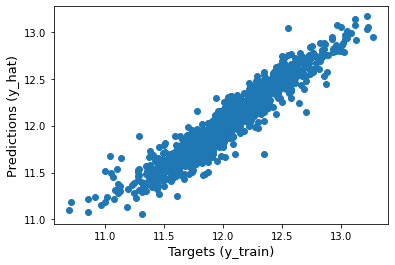

In [16]:
## Compare the targets and predictions for 'Train' set - scatterplot

plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=13)
plt.ylabel('Predictions (y_hat)',size=13);

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


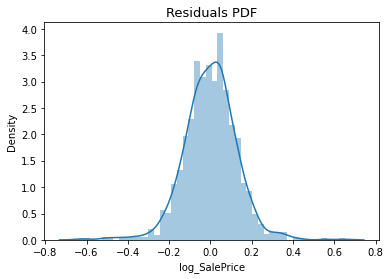

In [17]:
## Residual distribution - to check for anomalies

sns.distplot(y_train-y_hat)
plt.title('Residuals PDF',size=13);

In [18]:
## Looks like a balanced plot - normally distributed

### Evaluating this model - train set

In [19]:
reg3.score(x_train_scaled,y_train)

0.8969689008927775

In [20]:
## To calculate R2_adj later
def r2_adj(y_true, y_preds, p):
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return 1 - numerator / denominator

In [21]:
def lord_of_the_metrics(y_true, y_pred, p):
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = metrics.median_absolute_error(y_true, y_pred)
    msle = metrics.mean_squared_log_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    r2a = r2_adj(y_true, y_pred, p)
    
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
    print('Mean squared log error = ', msle)
    print('Median absolute error   = ', mae)
    print('R^2                     = ', r2)
    print('Adjusted R^2            = ', r2a)

In [22]:
lord_of_the_metrics(y_train, y_hat, inputs3.shape[1])

Mean squared error      =  0.01619848400254202
Root mean squared error =  0.1272732650737853
Mean squared log error =  9.716920847805522e-05
Median absolute error   =  0.0745769533826035
R^2                     =  0.8969689008927775
Adjusted R^2            =  0.892702414850452


### Finding Coefs & Intercepts

In [23]:
reg3.intercept_

12.01719513888616

In [24]:
reg3.coef_

array([ 0.04873968,  0.01190994,  0.12893818, -0.00344123, -0.00277083,
       -0.00178655,  0.06136952,  0.01228853, -0.01323214,  0.00534696,
        0.00874995,  0.02628387,  0.03097348,  0.01832124,  0.03796265,
        0.00861689,  0.02581744,  0.05253855,  0.01861865,  0.01505743,
       -0.01544228,  0.02015635,  0.0238813 ,  0.03531095, -0.01435877,
        0.0049392 ,  0.01077805, -0.00104049,  0.01308249,  0.03100889,
       -0.02113956,  0.00135949, -0.01637693,  0.00243453,  0.00107573,
        0.00264606,  0.0006584 ,  0.00487701, -0.01143797,  0.00645257,
        0.00388349, -0.03962862,  0.02411698, -0.00502497,  0.04813793,
        0.02560269,  0.00545816])

In [25]:
## reg2 summary
reg3_summary = pd.DataFrame(inputs3.columns.values, columns=['Features'])
reg3_summary['Coefficients'] = reg3.coef_
reg3_summary.head(3)

,Features,Coefficients
0,Lot Area,0.048740
1,Bedroom AbvGr,0.011910
2,Total Bsmt SF,0.128938


### Test-1

In [26]:
y_hat_test = reg3.predict(x_test_scaled)

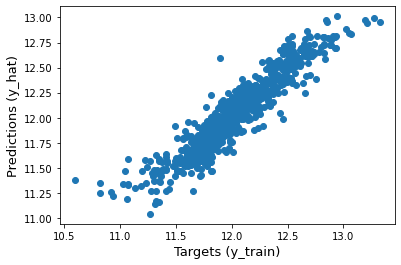

In [27]:
## Compare the targets and predictions for 'Train' set - scatterplot

plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets (y_train)',size=13)
plt.ylabel('Predictions (y_hat)',size=13);

In [28]:
lord_of_the_metrics(y_test, y_hat_test, inputs3.shape[1])

Mean squared error      =  0.01932792953606038
Root mean squared error =  0.13902492415412562
Mean squared log error =  0.00011604254125434513
Median absolute error   =  0.07943899672412336
R^2                     =  0.8721408430961564
Adjusted R^2            =  0.8640310180293809


In [29]:
reg3.score(x_test_scaled,y_test)

0.8721408430961564

In [30]:
cross_val_score(reg3,x_test,y_test, cv=10).mean()

0.8638448050487719

In [33]:
## Better results than Model#2 but still needs improvement - underfitted Model

- [BACK TO TOP](#MLR-Model#3)